# Testing Kqlmagic with parameterized query

The purpose of this notebook is to query Samples database in the Help ADX cluster. The default parameter is set to GEORGIA. When invoking this notebook, users can change the filter to something else.

The login is provided with az cli. If users already logged in, they won't have to do SSO anymore. 



## Set the stateFilter parameter

Default value for stateFilter is GEORGIA. It can be set to something else. 

In [1]:
stateFilter = "GEORGIA";

## Get the Azure login going via Azure CLI

The following snippet of code cells are borrowed from the Azure Data Studio Deployment script :)

In [2]:
import sys, os, json, time, string, random, subprocess
def run_command(command, json_decode = True, printOutput = True):
    print(command)
    process = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)
    output, error = process.communicate()
    if process.returncode != 0: 
        print("Process failed %d \n%s" % (process.returncode, error.decode("utf-8")))
        raise Exception()
    if output:
        output = output.decode("utf-8")
        if printOutput:
            print(output)
        try:
            return json.loads(output)
        except:
            return output


In [8]:
run_command('az login', printOutput = False)

az login


## Load Kqlmagic first

This assumes that Kqlmagic has been installed.


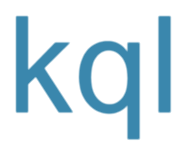

In [4]:
%reload_ext Kqlmagic

## Setup the connection

In [5]:
%kql azureDataExplorer://code;cluster='help';database='Samples' -try-azcli_login

## The query that would use the parameters

In [6]:
%%kql 
let _state = stateFilter;
StormEvents 
| where State == _state
| limit 10

,StartTime,EndTime,EpisodeId,EventId,State,EventType,InjuriesDirect,InjuriesIndirect,DeathsDirect,DeathsIndirect,DamageProperty,DamageCrops,Source,BeginLocation,EndLocation,BeginLat,BeginLon,EndLat,EndLon,EpisodeNarrative,EventNarrative,StormSummary
0,2007-12-30 16:00:00+00:00,2007-12-30 16:05:00+00:00,11749,64588,GEORGIA,Thunderstorm Wind,0,0,0,0,2000,0,Law Enforcement,LOTTS,LOTTS,31.5600,-82.8900,31.5600,-82.8900,An area of low pressure developed near the cen...,The county dispatch reported several trees wer...,"{'TotalDamages': 2000, 'StartTime': '2007-12-3..."
1,2007-12-30 18:30:00+00:00,2007-12-30 18:30:00+00:00,11833,64921,GEORGIA,Thunderstorm Wind,0,0,0,0,25000,0,Emergency Manager,MIDWAY,MIDWAY,31.8100,-81.4300,31.8100,-81.4300,A strong cold front pushed through southeaster...,Eight homes were reported to have sustained da...,"{'TotalDamages': 25000, 'StartTime': '2007-12-..."
2,2007-12-21 09:00:00+00:00,2007-12-21 10:00:00+00:00,11824,64901,GEORGIA,Flash Flood,0,0,0,0,6000,0,Law Enforcement,BONA BELLA,BONA BELLA,32.1000,-81.1800,32.0880,-81.1799,Low pressure developed off the coast of South ...,Heavy rain completely flooded parts of Commerc...,"{'TotalDamages': 6000, 'StartTime': '2007-12-2..."
3,2007-12-21 07:45:00+00:00,2007-12-21 10:00:00+00:00,11824,64899,GEORGIA,Flash Flood,0,0,0,0,0,0,Emergency Manager,PORT WENTWORTH,PORT WENTWORTH,32.1500,-81.1800,32.1604,-81.1830,Low pressure developed off the coast of South ...,Bonnie bridge Road was reported to be flooded ...,"{'TotalDamages': 0, 'StartTime': '2007-12-21T0..."
4,2007-12-21 09:35:00+00:00,2007-12-21 10:00:00+00:00,11824,64902,GEORGIA,Flash Flood,0,0,0,0,5000,0,Emergency Manager,SAVANNAH,SAVANNAH,32.0600,-81.0900,32.0599,-81.0929,Low pressure developed off the coast of South ...,One house was evacuated due to flooding on Eas...,"{'TotalDamages': 5000, 'StartTime': '2007-12-2..."
5,2007-12-21 09:35:00+00:00,2007-12-21 10:00:00+00:00,11824,64903,GEORGIA,Flash Flood,0,0,0,0,0,0,Emergency Manager,(SAV)SAVANNAH INTL A,GARDEN CITY,32.1288,-81.1885,32.1229,-81.1842,Low pressure developed off the coast of South ...,The intersection of Robert Miller and Highway ...,"{'TotalDamages': 0, 'StartTime': '2007-12-21T0..."
6,2007-12-21 11:15:00+00:00,2007-12-21 12:00:00+00:00,11824,64904,GEORGIA,Flash Flood,0,0,0,0,0,0,Emergency Manager,SAVANNAH,SAVANNAH,32.0500,-81.0800,32.0744,-81.0810,Low pressure developed off the coast of South ...,Chatham County Emergency Management reported t...,"{'TotalDamages': 0, 'StartTime': '2007-12-21T1..."
7,2007-12-21 08:25:00+00:00,2007-12-21 10:00:00+00:00,11824,64900,GEORGIA,Flash Flood,0,0,0,0,0,0,Emergency Manager,CENTRAL JCT,CENTRAL JCT,32.0878,-81.1193,32.0785,-81.1179,Low pressure developed off the coast of South ...,The Chatham County Emergency Manager reported ...,"{'TotalDamages': 0, 'StartTime': '2007-12-21T0..."
8,2007-08-26 13:20:00+00:00,2007-08-26 13:20:00+00:00,10444,58115,GEORGIA,Thunderstorm Wind,0,0,0,0,0,0,Trained Spotter,MOUNTAIN CITY,MOUNTAIN CITY,34.9200,-83.3800,34.9200,-83.3800,An isolated severe storm affected extreme nort...,Six trees blown down around Mountain City.,"{'TotalDamages': 0, 'StartTime': '2007-08-26T1..."
9,2007-08-23 14:20:00+00:00,2007-08-23 14:20:00+00:00,10412,57947,GEORGIA,Hail,0,0,0,0,0,0,Park/Forest Service,CLAYTON,CLAYTON,34.7778,-83.5245,34.7778,-83.5245,An isolated severe storm produced large hail i...,Ping-pong ball size hail reported on Seed Lake...,"{'TotalDamages': 0, 'StartTime': '2007-08-23T1..."


[{'StartTime': datetime.datetime(2007, 12, 30, 16, 0, tzinfo=tzutc()), 'EndTime': datetime.datetime(2007, 12, 30, 16, 5, tzinfo=tzutc()), 'EpisodeId': 11749, 'EventId': 64588, 'State': 'GEORGIA', 'EventType': 'Thunderstorm Wind', 'InjuriesDirect': 0, 'InjuriesIndirect': 0, 'DeathsDirect': 0, 'DeathsIndirect': 0, 'DamageProperty': 2000, 'DamageCrops': 0, 'Source': 'Law Enforcement', 'BeginLocation': 'LOTTS', 'EndLocation': 'LOTTS', 'BeginLat': 31.56, 'BeginLon': -82.89, 'EndLat': 31.56, 'EndLon': -82.89, 'EpisodeNarrative': 'An area of low pressure developed near the central Gulf coast states and tracked northeast along a nearly stationary front across south Georgia during the late afternoon of December 30th.  Pre-frontal storms developed across south Georgia where surface based lifted indices were near -2 to -3. Storms had persistent mesocyclone rotations and several storms developed bow echo signatures with outbound velocities around 40 to 50 knots along the leading edge of the bow around 3-4 kft above ground level prior to warning issuance.', 'EventNarrative': 'The county dispatch reported several trees were blown down along Quincey Batten Loop near State Road 206. The cost of tree removal was estimated.', 'StormSummary': {'TotalDamages': 2000, 'StartTime': '2007-12-30T16:00:00.0000000Z', 'EndTime': '2007-12-30T16:05:00.0000000Z', 'Details': {'Description': 'The county dispatch reported several trees were blown down along Quincey Batten Loop near State Road 206. The cost of tree removal was estimated.', 'Location': 'GEORGIA'}}},
 {'StartTime': datetime.datetime(2007, 12, 30, 18, 30, tzinfo=tzutc()), 'EndTime': datetime.datetime(2007, 12, 30, 18, 30, tzinfo=tzutc()), 'EpisodeId': 11833, 'EventId': 64921, 'State': 'GEORGIA', 'EventType': 'Thunderstorm Wind', 'InjuriesDirect': 0, 'InjuriesIndirect': 0, 'DeathsDirect': 0, 'DeathsIndirect': 0, 'DamageProperty': 25000, 'DamageCrops': 0, 'Source': 'Emergency Manager', 'BeginLocation': 'MIDWAY', 'EndLocation': 'MIDWAY', 'BeginLat': 31.81, 'BeginLon': -81.43, 'EndLat': 31.81, 'EndLon': -81.43, 'EpisodeNarrative': 'A strong cold front pushed through southeastern Georgia resulting in a couple strong thunderstorms.', 'EventNarrative': 'Eight homes were reported to have sustained damage by debris and tree branches. One home had brick siding separate from the home. Several trees were reported to have snapped off at the base.', 'StormSummary': {'TotalDamages': 25000, 'StartTime': '2007-12-30T18:30:00.0000000Z', 'EndTime': '2007-12-30T18:30:00.0000000Z', 'Details': {'Description': 'Eight homes were reported to have sustained damage by debris and tree branches. One home had brick siding separate from the home. Several trees were reported to have snapped off at the base.', 'Location': 'GEORGIA'}}},
 {'StartTime': datetime.datetime(2007, 12, 21, 9, 0, tzinfo=tzutc()), 'EndTime': datetime.datetime(2007, 12, 21, 10, 0, tzinfo=tzutc()), 'EpisodeId': 11824, 'EventId': 64901, 'State': 'GEORGIA', 'EventType': 'Flash Flood', 'InjuriesDirect': 0, 'InjuriesIndirect': 0, 'DeathsDirect': 0, 'DeathsIndirect': 0, 'DamageProperty': 6000, 'DamageCrops': 0, 'Source': 'Law Enforcement', 'BeginLocation': 'BONA BELLA', 'EndLocation': 'BONA BELLA', 'BeginLat': 32.1, 'BeginLon': -81.18, 'EndLat': 32.088, 'EndLon': -81.1799, 'EpisodeNarrative': 'Low pressure developed off the coast of South Carolina and Georgia as a potent upper level disturbance moved across the region. Moderate to heavy rains fell across the area, bringing much needed rainfall to some drought stricken areas. The pressure gradient between the area of low pressure and a wedge of high pressure across the piedmont of South Carolina and Georgia, associated with strong cold air damming, produced strong winds along the coast.', 'EventNarrative': 'Heavy rain completely flooded parts of Commerce Boulevard in Garden City, Georgia. The depth of the water was as high as 6 feet in places and several cars were reported to be completely submerged.', 'StormSumma